# Mitsiu Alejandro Carreño Sarabia

Vamos a usar la api de ruteo del INEGI [Referencia](https://www.inegi.org.mx/servicios/Ruteo/Default.html#ApiInfo)

Haciendo un análisis la petición es así:


```bash
curl 'https://gaia.inegi.org.mx/sakbe_v3.1/detalle_o' -X POST 
-H 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0' 
-H 'Accept: */*' 
-H 'Accept-Language: en-US,en;q=0.5' 
-H 'Accept-Encoding: gzip, deflate, br' 
-H 'Content-Type: application/x-www-form-urlencoded; charset=UTF-8' 
-H 'Origin: https://www.inegi.org.mx' 
-H 'DNT: 1' 
-H 'Connection: keep-alive' 
-H 'Referer: https://www.inegi.org.mx/' 
-H 'Sec-Fetch-Dest: empty' 
-H 'Sec-Fetch-Mode: cors' 
-H 'Sec-Fetch-Site: same-site' 
--data-raw '
type=json
&key=kqvCNH1V-keUF-rSVa-O1tf-gdqFN6DynMNN
&proj=MERC
&id_i=1613470
&source_i=879858
&target_i=22140
&id_f=902000
&source_f=705622
&target_f=504517
&v=2
&e=0'
'''
```



In [1]:
# Importamos la librería para hacer la petición y json porque vamos a recibir uno
import requests
import json

payload_tuples = [
    ('type', 'json'), 
    ('key', 'kqvCNH1V-keUF-rSVa-O1tf-gdqFN6DynMNN'),
    ('proj','MERC'),
    ('id_i','1613470'),
    ('source_i','879858'),
    ('target_i','22140'),
    ('id_f','902000'),
    ('source_f','705622'),
    ('target_f','504517'),
    ('v','2'),
    ('e','0')
]

url=f'https://gaia.inegi.org.mx/sakbe_v3.1/detalle_o'
r1 = requests.post(url, data=payload_tuples)

print(r1.status_code)

contenido = json.loads(r1.content)

print(contenido)


200
{'data': [{'geojson': '{"type":"Point","crs":{"type":"name","properties":{"name":"spatialreferencing.org:900913"}},"coordinates":[-11540914.761749294,2774589.970619673]}', 'eje_excedente': 0.0, 'costo_caseta': 0.0, 'tiempo_min': 0.0, 'long_m': 0.0, 'punto_caseta': None, 'direccion': 'Inicia recorrido en Camino', 'giro': 0}, {'geojson': '{"type":"Point","crs":{"type":"name","properties":{"name":"spatialreferencing.org:900913"}},"coordinates":[-11540914.761749294,2774589.970619673]}', 'eje_excedente': 0.0, 'costo_caseta': 0.0, 'tiempo_min': 6.7918935927723, 'long_m': 3395.94679638615, 'punto_caseta': None, 'direccion': 'Continúe por el Camino en dirección al este', 'giro': 0}, {'geojson': '{"type":"Point","crs":{"type":"name","properties":{"name":"spatialreferencing.org:900913"}},"coordinates":[-11537439.611147735,2775409.713922401]}', 'eje_excedente': 0.0, 'costo_caseta': 0.0, 'tiempo_min': 1.550328072535382, 'long_m': 775.164036267691, 'punto_caseta': None, 'direccion': 'Gire a la 

In [3]:
# Con los datos ya en nuestra variable r1, vamos a ponerlos en un DataFrame de pandas
import pandas as pd

df_ruta = pd.DataFrame(contenido["data"])

# Y analizamos su contenido 
print(df_ruta.head)
print(df_ruta.dtypes)

<bound method NDFrame.head of                                                geojson  eje_excedente  \
0    {"type":"Point","crs":{"type":"name","properti...            0.0   
1    {"type":"Point","crs":{"type":"name","properti...            0.0   
2    {"type":"Point","crs":{"type":"name","properti...            0.0   
3    {"type":"Point","crs":{"type":"name","properti...            0.0   
4    {"type":"Point","crs":{"type":"name","properti...            0.0   
..                                                 ...            ...   
170  {"type":"Point","crs":{"type":"name","properti...            0.0   
171  {"type":"Point","crs":{"type":"name","properti...            0.0   
172  {"type":"Point","crs":{"type":"name","properti...            0.0   
173  {"type":"Point","crs":{"type":"name","properti...            0.0   
174  {"type":"Point","crs":{"type":"name","properti...            0.0   

     costo_caseta  tiempo_min        long_m punto_caseta  \
0             0.0    0.000000    

La verdad no sé porque me aparece el 
```
<bound method NDFrame.head of
```

creo que es el nombre de la primera columna, pero no estoy seguro....

Luego imprimimos la relación entre los metros recorridos y el tiempo que nos tomo en cada punto de la ruta



<AxesSubplot:xlabel='tiempo_min', ylabel='long_m'>

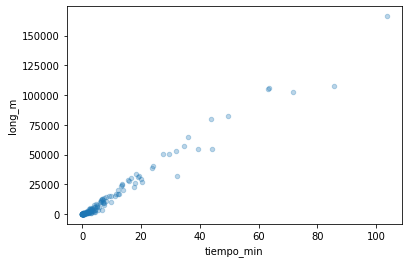

In [4]:
df_ruta.plot.scatter(x="tiempo_min", y="long_m", alpha=0.3)

Lo siguiente que se me ocurre es ver si hay más curvas a la derecha o a la izquierda basado en las indicaciones de dirección que me regresa

<AxesSubplot:xlabel='label'>

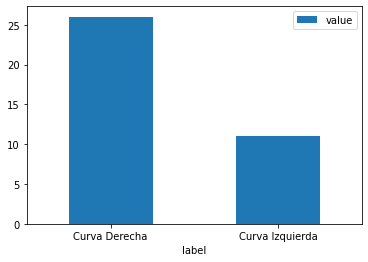

In [5]:
# Aprendiendo a filtrar por substrings
#df_ruta[df_ruta['direccion'].str.contains("derecha")]
#df_ruta[df_ruta['direccion'].str.contains("izquierda")]

df_curvas = pd.DataFrame({
    "label":["Curva Derecha", "Curva Izquierda"], 
    "value":[
        len(df_ruta[df_ruta["direccion"].str.contains("derecha")]),
        len(df_ruta[df_ruta["direccion"].str.contains("izquierda")])
    ]
})

df_curvas.plot.bar(x="label", y="value", rot=0)

Luego vamos a ver cuál es la velocidad para cada tramo de la ruta

In [6]:
# Convertimos de metros/min a kilometros/hora
df_ruta["velocidad"] = (df_ruta["long_m"]/df_ruta["tiempo_min"])/(1000/60)
df_ruta[["long_m", "tiempo_min", "velocidad"]]

# Podemos explorar cuál es el promedio, minimas y máximas
df_ruta["velocidad"].describe()

count    172.000000
mean      68.185264
std       30.945021
min       10.000000
25%       40.000000
50%       68.857575
75%      100.000000
max      110.000000
Name: velocidad, dtype: float64

Finalmente queremos saber que tan largos son los tramos

<AxesSubplot:ylabel='longitud mts'>

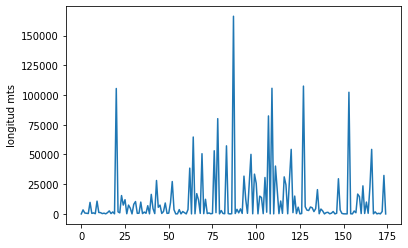

In [7]:
df_ruta["long_m"].plot.line(x="Punto en ruta", ylabel="longitud mts")

Y que tan rapido o lento se recorre cada tramo

<AxesSubplot:xlabel='Punto en ruta', ylabel='Minutos'>

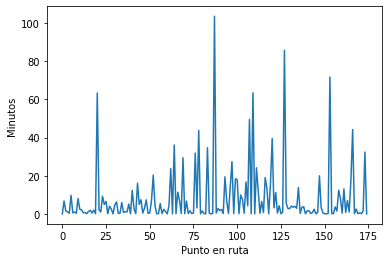

In [8]:
df_ruta["tiempo_min"].plot.line(xlabel="Punto en ruta", ylabel="Minutos")